In [3]:
# %pip install wfdb

import wfdb
import numpy as np
import matplotlib.pyplot as plt

record = wfdb.rdrecord("mit-bih-arrhythmia-database-1.0.0/100")
annotation = wfdb.rdann("mit-bih-arrhythmia-database-1.0.0/100", "atr")

# Display basic info
print(record.__dict__.keys())
print(annotation.__dict__.keys())

dict_keys(['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size'])
dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])


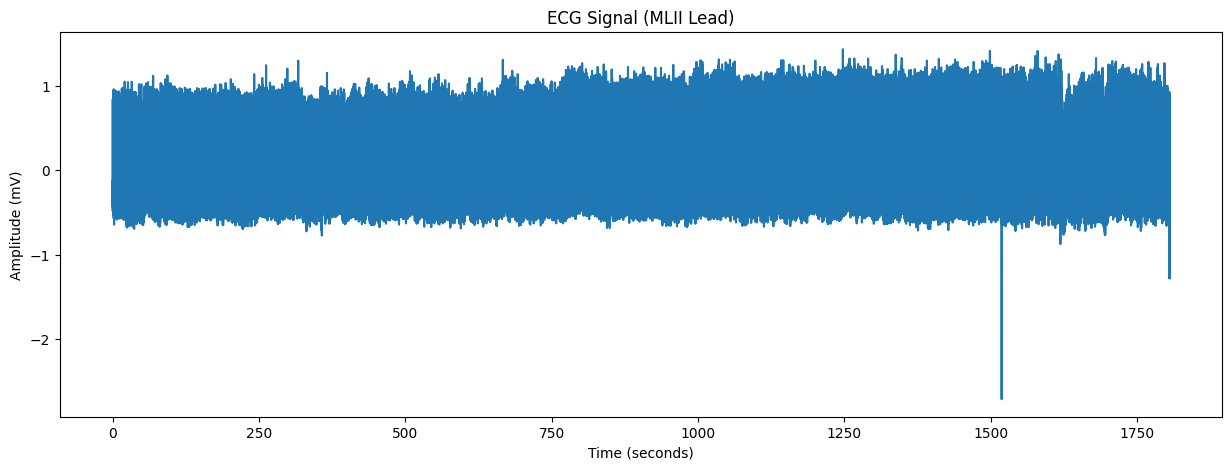

In [4]:
# Plot only the MLII signal (first column) and time (in seconds)
signal = record.p_signal
fs = record.fs
time = np.arange(signal.shape[0]) / fs
mlii_signal = signal[:, 0]

plt.figure(figsize=(15, 5))
plt.plot(time, mlii_signal)
plt.title("ECG Signal (MLII Lead)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.show()

In [5]:
# Display the attributes and a summary of the record object
print(record)
print("\nRecord attributes:")
for attr in record.__dict__:
    print(f"{attr}: {getattr(record, attr)}")


Record attributes:
record_name: 100
n_sig: 2
fs: 360
counter_freq: None
base_counter: None
sig_len: 650000
base_time: None
base_date: None
comments: ['69 M 1085 1629 x1', 'Aldomet, Inderal']
sig_name: ['MLII', 'V5']
p_signal: [[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
d_signal: None
e_p_signal: None
e_d_signal: None
file_name: ['100.dat', '100.dat']
fmt: ['212', '212']
samps_per_frame: [1, 1]
skew: [None, None]
byte_offset: [None, None]
adc_gain: [200.0, 200.0]
baseline: [1024, 1024]
units: ['mV', 'mV']
adc_res: [11, 11]
adc_zero: [1024, 1024]
init_value: [995, 1011]
checksum: [-22131, 20052]
block_size: [0, 0]


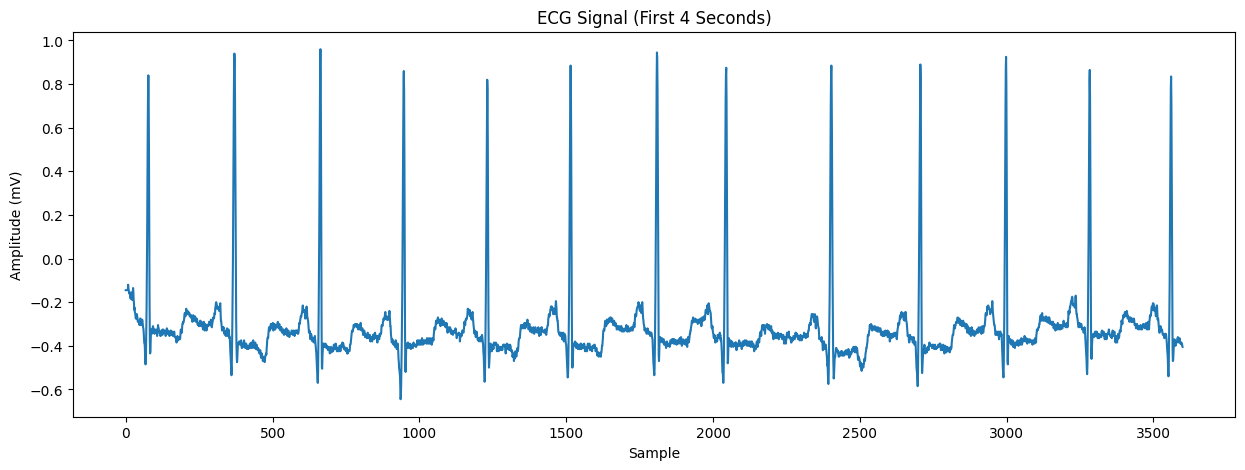

In [6]:
# Plot up to 4 seconds of the ECG signal
# fs and end_sample are already defined in previous cells

plt.figure(figsize=(15, 5))
end_sample = fs * 10
plt.plot(mlii_signal[:end_sample])
plt.title("ECG Signal (First 4 Seconds)")
plt.xlabel("Sample")
plt.ylabel("Amplitude (mV)")
plt.show()

R peak @ sample number 78, 371, 664, 948, 1232 <br>
P wave @ sample number 25, 308, 604, 883, 1167 <br>
Find RR interval, PP, PR interval

In [7]:
r_peaks = np.array([78, 371, 664, 948, 1232])
p_waves = np.array([25, 308, 604, 883, 1167])
# Define missing variables if not already defined
# RR intervals (in seconds) between consecutive R peaks
rr_intervals = np.diff(r_peaks) / fs

# PP intervals (in seconds) between consecutive P waves
pp_intervals = np.diff(p_waves) / fs

# PR intervals (in seconds) from each P wave to the next R peak (assuming same length)
pr_intervals = (r_peaks[:len(p_waves)] - p_waves) / fs
# Calculate average RR, PP, and PR intervals (in seconds)
avg_rr = np.mean(rr_intervals)
avg_pp = np.mean(pp_intervals)
avg_pr = np.mean(pr_intervals)

print("Average RR interval (s):", avg_rr)
print("Average PP interval (s):", avg_pp)
print("Average PR interval (s):", avg_pr)


Average RR interval (s): 0.8013888888888888
Average PP interval (s): 0.7930555555555555
Average PR interval (s): 0.16999999999999998


In [8]:
avg_rr*360

288.5